# Stock Price Prediction

Ref: https://www.youtube.com/watch?v=cCDu5i6UQEM

### Load data

In [1]:
import yfinance as yf

df = yf.Ticker('0005.HK').history(period='10y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-05-05 00:00:00+08:00,46.478666,46.743588,45.919393,46.066570,11938170,0.0,0.0
2014-05-07 00:00:00+08:00,46.596417,46.625850,46.096014,46.154884,20361763,0.0,0.0
2014-05-08 00:00:00+08:00,46.037133,46.360925,45.772215,46.066570,10339660,0.0,0.0
2014-05-09 00:00:00+08:00,45.831090,45.919397,45.477864,45.860527,7516050,0.0,0.0
2014-05-12 00:00:00+08:00,46.096008,46.743588,45.654475,46.419796,18185489,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-26 00:00:00+08:00,64.800003,65.000000,64.599998,64.949997,24404160,0.0,0.0
2024-04-29 00:00:00+08:00,65.050003,65.599998,64.900002,65.550003,31462055,0.0,0.0
2024-04-30 00:00:00+08:00,65.400002,67.050003,65.199997,67.000000,39704597,0.0,0.0


In [2]:
df = df.filter(['Close'])
df = df.rename(columns={'Close': 'GT'})
df

,GT
Date,
2014-05-05 00:00:00+08:00,46.066570
2014-05-07 00:00:00+08:00,46.154884
2014-05-08 00:00:00+08:00,46.066570
2014-05-09 00:00:00+08:00,45.860527
2014-05-12 00:00:00+08:00,46.419796
...,...
2024-04-26 00:00:00+08:00,64.949997
2024-04-29 00:00:00+08:00,65.550003
2024-04-30 00:00:00+08:00,67.000000


### Visualize data

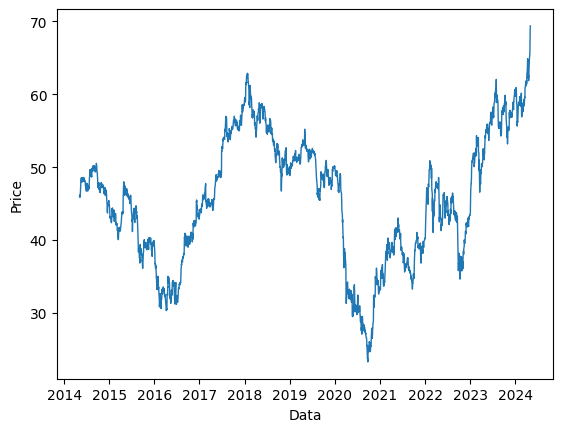

In [3]:
import matplotlib.pyplot as plt

# plt.style.use('seaborn-darkgrid')
plt.xlabel('Data')
plt.ylabel('Price')
plt.plot(df['GT'], linewidth=1)
plt.show()

### Standardize data

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(df.values)
scaled_prices

array([[0.49430854],
       [0.49622663],
       [0.49430854],
       ...,
       [0.94896052],
       [0.99782814],
       [1.        ]])

### Construct datasets

In [5]:
import numpy as np

MOVING_WITH_SIZE = 60  # days

all_x, all_y = [], []
for i in range(len(scaled_prices) - MOVING_WITH_SIZE):
    x = scaled_prices[i:i + MOVING_WITH_SIZE]
    y = scaled_prices[i + MOVING_WITH_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y)

In [6]:
all_x.shape

(2405, 60, 1)

In [7]:
all_y.shape

(2405, 1)

### Split datasets

In [8]:
DS_SPLIT = 0.8

train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y = all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y = all_x[train_ds_size:], all_y[train_ds_size:]

In [9]:
train_x.shape

(1924, 60, 1)

In [10]:
train_y.shape

(1924, 1)

In [11]:
test_x.shape

(481, 60, 1)

In [12]:
test_y.shape

(481, 1)

### Construct model

In [13]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

/Users/weilh/Library/Caches/pypoetry/virtualenvs/aistock--dymrmeb-py3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')  # Adam: Adaptive Moment Estimation

### Train model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model.fit(train_x, train_y, 
          validation_split=0.2,
          callbacks=[callback],
          epochs=1000)

Epoch 1/1000


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0594 - val_loss: 0.0026
Epoch 2/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 3/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.6027e-04 - val_loss: 0.0016
Epoch 4/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.2819e-04 - val_loss: 0.0015
Epoch 5/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.2770e-04 - val_loss: 0.0015
Epoch 6/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.7057e-04 - val_loss: 0.0013
Epoch 7/1000
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.1002e-04 - val_loss: 0.0014


### Evaluate model

In [16]:
preds = model.predict(test_x)
preds

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.41187406],
       [0.40994686],
       [0.40892094],
       [0.40953213],
       [0.41277966],
       [0.41795737],
       [0.42501575],
       [0.43350428],
       [0.4422955 ],
       [0.45128927],
       [0.4597692 ],
       [0.46782792],
       [0.47427177],
       [0.47878098],
       [0.48104683],
       [0.48096725],
       [0.47798187],
       [0.4739849 ],
       [0.46977213],
       [0.46550724],
       [0.461281  ],
       [0.45720243],
       [0.4552893 ],
       [0.4541786 ],
       [0.4537394 ],
       [0.45394555],
       [0.4555893 ],
       [0.45838094],
       [0.46169817],
       [0.4649834 ],
       [0.46768743],
       [0.46950108],
       [0.4687838 ],
       [0.46692485],
       [0.46445465],
       [0.46086222],
       [0.45674208],
       [0.45249835],
       [0.44827718],
       [0.44298968],
       [0.43870953],
       [0.43493798],
       [0.43218702],
       [0.42923865],
       [0.4267383 ],
       [0.4249028 ],
       [0.42485982],
       [0.425

In [17]:
preds = scaler.inverse_transform(preds)
preds

array([[42.27106 ],
       [42.182327],
       [42.13509 ],
       [42.16323 ],
       [42.312756],
       [42.55115 ],
       [42.87614 ],
       [43.266975],
       [43.671745],
       [44.085842],
       [44.476284],
       [44.847332],
       [45.144024],
       [45.35164 ],
       [45.455963],
       [45.4523  ],
       [45.314846],
       [45.130814],
       [44.936848],
       [44.74048 ],
       [44.54589 ],
       [44.358105],
       [44.27002 ],
       [44.218876],
       [44.198658],
       [44.208145],
       [44.28383 ],
       [44.412365],
       [44.5651  ],
       [44.716362],
       [44.840862],
       [44.924366],
       [44.891342],
       [44.80575 ],
       [44.692017],
       [44.52661 ],
       [44.336906],
       [44.141514],
       [43.94716 ],
       [43.70371 ],
       [43.506638],
       [43.332985],
       [43.206326],
       [43.07057 ],
       [42.95545 ],
       [42.87094 ],
       [42.86896 ],
       [42.91471 ],
       [42.9795  ],
       [43.046127],


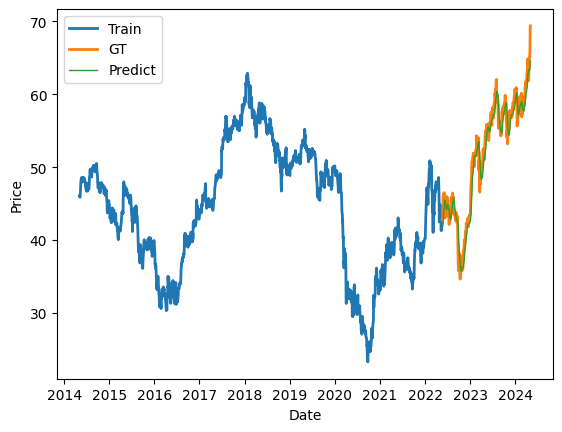

In [18]:
train_df = df[:train_ds_size + MOVING_WITH_SIZE]
test_df = df[train_ds_size + MOVING_WITH_SIZE:]
test_df = test_df.assign(Prediction=preds)

plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train_df['GT'], linewidth=2)
plt.plot(test_df['GT'], linewidth=2)
plt.plot(test_df['Prediction'], linewidth=1)
plt.legend(['Train', 'GT', 'Predict'])
plt.show()

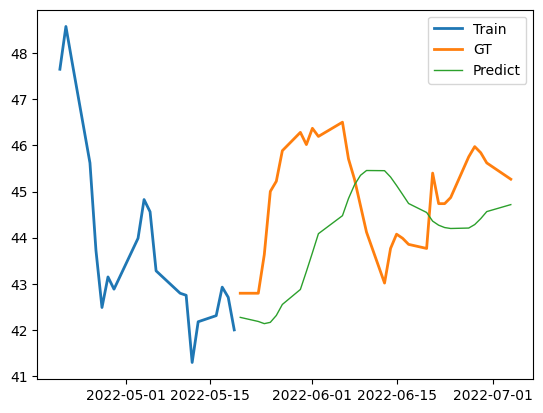

In [20]:
plt.plot(train_df['GT'][-20:], linewidth=2)
plt.plot(test_df['GT'][:30], linewidth=2)
plt.plot(test_df['Prediction'][:30], linewidth=1)
plt.legend(['Train', 'GT', 'Predict'])
plt.show()

In [22]:
test_df = test_df.assign(Shifted=test_df['GT'].shift(1))
test_df.iat[0, -1] = train_df.iat[-1, -1]
test_df

,GT,Prediction,Shifted
Date,,,
2022-05-20 00:00:00+08:00,42.794304,42.271061,41.999359
2022-05-23 00:00:00+08:00,42.794304,42.182327,42.794304
2022-05-24 00:00:00+08:00,43.633400,42.135090,42.794304
2022-05-25 00:00:00+08:00,45.002468,42.163231,43.633400
2022-05-26 00:00:00+08:00,45.223286,42.312756,45.002468
...,...,...,...
2024-04-26 00:00:00+08:00,64.949997,63.416603,64.750000
2024-04-29 00:00:00+08:00,65.550003,63.574287,64.949997
2024-04-30 00:00:00+08:00,67.000000,63.779552,65.550003


In [23]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df['GT'], test_df['Prediction'], squared=False)
predict_cvrmse = predict_rmse / test_df['GT'].mean() * 100
predict_cvrmse  # Coefficient of Variation of the Root Mean Squared Error

/Users/weilh/Library/Caches/pypoetry/virtualenvs/aistock--dymrmeb-py3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.21182759571177

In [24]:
shifted_rmse = mean_squared_error(test_df['GT'], test_df['Shifted'], squared=False)
shifted_cvrmse = shifted_rmse / test_df['GT'].mean() * 100
shifted_cvrmse

/Users/weilh/Library/Caches/pypoetry/virtualenvs/aistock--dymrmeb-py3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.388678014111186